In [1]:
#Need to compare the BERT model with the regular SVM model 

In [3]:
from datasets import load_dataset
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import pickle
import os
from sklearn.metrics import classification_report, accuracy_score, f1_score, plot_confusion_matrix,ConfusionMatrixDisplay, confusion_matrix
import pickle
os.environ["WANDB_DISABLED"] = "true"

In [4]:
model_name = "bert-base-uncased"
max_length=128

In [7]:
#loading the label encoder
le = pickle.load(open("Data/label_encoder.pkl", "rb"))

In [8]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [12]:
target_names=le.transform(le.classes_)
target_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
def preprocess_function(examples):
    #print(examples['TEXT'])
    return tokenizer(examples["text"], padding=True, truncation=True)
    #return toknizer(examples["text"],padding='max_length',truncation=True, max_length=max_length)

In [14]:
def get_prediction(text):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to("cuda")
    
    # perform inference to our model
    outputs = model(**inputs)
    #print(outputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    #print(outputs[0].softmax(1).argmax())
    # executing argmax function to get the candidate label
    return probs.argmax().item()

## Kfold

In [15]:
best_params = {"batch_size":8, 
              "lr": 5e-5,
               
              "epochs": 40}

Using custom data configuration default-39460bdd07acc7bf
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-39460bdd07acc7bf\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-38d3ac2bff9f4eb2
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-38d3ac2bff9f4eb2\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-39460bdd07acc7bf\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-0c03d44608866328.arrow
Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-38d3ac2bff9f4eb2\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-96dbeb40b209ba5f.arrow
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\adianidm/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
 

----------------------MODEL 0-------------------------------


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at C:\Users\adianidm/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertFo

Step,Training Loss
100,1.516600
200,0.637000
300,0.322600
400,0.182500
500,0.084800
600,0.053100
700,0.036600
800,0.035800
900,0.009600
1000,0.033000


Saving model checkpoint to Models/BERT_13classes\checkpoint-500
Configuration saved in Models/BERT_13classes\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1000
Configuration saved in Models/BERT_13classes\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1500
Configuration saved in Models/BERT_13classes\checkpoint-1500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1500\pytorch_

              precision    recall  f1-score   support

         ack       1.00      1.00      1.00         3
         dno       0.80      0.80      0.80         5
          fa       1.00      1.00      1.00         6
          fe       0.93      1.00      0.96        13
          fp       0.80      0.89      0.84         9
          ft       1.00      0.90      0.95        10
           n       0.86      0.92      0.89        13
         n-d       0.00      0.00      0.00         2
       query       1.00      1.00      1.00         4
         sno       0.89      0.90      0.90        83
          so       0.00      0.00      0.00         5
           y       0.89      1.00      0.94         8
         y-d       1.00      0.60      0.75         5

    accuracy                           0.87       166
   macro avg       0.78      0.77      0.77       166
weighted avg       0.87      0.87      0.87       166



Saving model checkpoint to Models/BERT_13classes_final
Configuration saved in Models/BERT_13classes_final\config.json
Model weights saved in Models/BERT_13classes_final\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_final\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_final\special_tokens_map.json
Using custom data configuration default-c94492fa8977105f
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-c94492fa8977105f\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-b39b13b3f218eb93
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-b39b13b3f218eb93\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-c94492fa8977105f\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-64e36aca893dd606.arrow
Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-b39b13b3f218eb93\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-ec3292cc75413797.arrow


----------------------MODEL 1-------------------------------


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\adianidm/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
   

Step,Training Loss
100,1.565300
200,0.685500
300,0.320500
400,0.211700
500,0.122800
600,0.071000
700,0.043700
800,0.040500
900,0.044200
1000,0.031700


Saving model checkpoint to Models/BERT_13classes\checkpoint-500
Configuration saved in Models/BERT_13classes\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1000
Configuration saved in Models/BERT_13classes\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1500
Configuration saved in Models/BERT_13classes\checkpoint-1500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1500\pytorch_

              precision    recall  f1-score   support

         ack       0.00      0.00      0.00         1
         dno       0.67      0.67      0.67         6
          fa       0.90      0.90      0.90        10
          fe       1.00      0.73      0.84        11
          fp       1.00      0.87      0.93        15
          ft       1.00      1.00      1.00         6
           n       0.80      0.80      0.80        10
         n-d       0.00      0.00      0.00         2
       query       0.83      1.00      0.91         5
         sno       0.87      0.90      0.88        81
          so       0.60      0.50      0.55         6
           y       0.73      1.00      0.84         8
         y-d       1.00      0.60      0.75         5

    accuracy                           0.84       166
   macro avg       0.72      0.69      0.70       166
weighted avg       0.86      0.84      0.84       166



Configuration saved in Models/BERT_13classes_final\config.json
Model weights saved in Models/BERT_13classes_final\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_final\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_final\special_tokens_map.json
Using custom data configuration default-98ddc8d7580f8bc3
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-98ddc8d7580f8bc3\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-b99673641499d8f3
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-b99673641499d8f3\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-98ddc8d7580f8bc3\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-4c0b0d8e8ad7522e.arrow
Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-b99673641499d8f3\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-49089b73dceb9b21.arrow
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\adianidm/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
 

----------------------MODEL 2-------------------------------


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at C:\Users\adianidm/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertFo

Step,Training Loss
100,1.557100
200,0.619800
300,0.346200
400,0.187000
500,0.102000
600,0.063400
700,0.052000
800,0.049900
900,0.053900
1000,0.031900


Saving model checkpoint to Models/BERT_13classes\checkpoint-500
Configuration saved in Models/BERT_13classes\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1000
Configuration saved in Models/BERT_13classes\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1500
Configuration saved in Models/BERT_13classes\checkpoint-1500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1500\pytorch_

              precision    recall  f1-score   support

         ack       0.50      1.00      0.67         1
         dno       1.00      0.79      0.88        14
          fa       1.00      1.00      1.00        12
          fe       1.00      0.91      0.95        11
          fp       0.92      0.85      0.88        13
          ft       0.89      1.00      0.94         8
           n       1.00      0.78      0.88         9
         n-d       1.00      1.00      1.00         1
       query       0.86      0.86      0.86         7
         sno       0.90      0.99      0.94        73
          so       1.00      0.50      0.67         4
           y       0.89      0.80      0.84        10
         y-d       0.67      1.00      0.80         2

    accuracy                           0.92       165
   macro avg       0.89      0.88      0.87       165
weighted avg       0.92      0.92      0.91       165



Configuration saved in Models/BERT_13classes_final\config.json
Model weights saved in Models/BERT_13classes_final\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_final\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_final\special_tokens_map.json
Using custom data configuration default-bbdf4ddd915aa9c5
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-bbdf4ddd915aa9c5\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-9bb1bee6ba541638
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-9bb1bee6ba541638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-bbdf4ddd915aa9c5\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-f2e42b6cc0805d1e.arrow
Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-9bb1bee6ba541638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-c26567e1cc560e28.arrow
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\adianidm/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
 

----------------------MODEL 3-------------------------------


loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at C:\Users\adianidm/.cache\huggingface\transformers\a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertFo

Step,Training Loss
100,1.484200
200,0.576100
300,0.316300
400,0.176900
500,0.092500
600,0.066800
700,0.015300
800,0.029800
900,0.027700
1000,0.023800


Saving model checkpoint to Models/BERT_13classes\checkpoint-500
Configuration saved in Models/BERT_13classes\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1000
Configuration saved in Models/BERT_13classes\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1500
Configuration saved in Models/BERT_13classes\checkpoint-1500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1500\pytorch_

              precision    recall  f1-score   support

         ack       0.67      0.80      0.73         5
         dno       0.75      1.00      0.86         9
          fa       1.00      1.00      1.00         5
          fe       1.00      0.88      0.93         8
          fp       0.73      0.80      0.76        10
          ft       1.00      1.00      1.00         8
           n       0.67      0.86      0.75         7
         n-d       0.33      0.33      0.33         3
       query       1.00      0.90      0.95        10
         sno       0.93      0.91      0.92        75
          so       0.40      0.29      0.33         7
           y       1.00      0.93      0.96        14
         y-d       1.00      1.00      1.00         4

    accuracy                           0.87       165
   macro avg       0.81      0.82      0.81       165
weighted avg       0.88      0.87      0.87       165



Saving model checkpoint to Models/BERT_13classes_final
Configuration saved in Models/BERT_13classes_final\config.json
Model weights saved in Models/BERT_13classes_final\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_final\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_final\special_tokens_map.json
Using custom data configuration default-aa12508fefee773d
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-aa12508fefee773d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-22230474c63e2a7d
Reusing dataset csv (C:\Users\adianidm\.cache\huggingface\datasets\csv\default-22230474c63e2a7d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-aa12508fefee773d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-8369730ef2a65754.arrow
Loading cached processed dataset at C:\Users\adianidm\.cache\huggingface\datasets\csv\default-22230474c63e2a7d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-2f7f6c95caa541ef.arrow


----------------------MODEL 4-------------------------------


loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\adianidm/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
   

Step,Training Loss
100,1.486500
200,0.628400
300,0.287200
400,0.132500
500,0.114700
600,0.048300
700,0.042300
800,0.027800
900,0.025400
1000,0.016400


Saving model checkpoint to Models/BERT_13classes\checkpoint-500
Configuration saved in Models/BERT_13classes\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1000
Configuration saved in Models/BERT_13classes\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes\checkpoint-1500
Configuration saved in Models/BERT_13classes\checkpoint-1500\config.json
Model weights saved in Models/BERT_13classes\checkpoint-1500\pytorch_

              precision    recall  f1-score   support

         ack       1.00      1.00      1.00         3
         dno       1.00      0.70      0.82        10
          fa       1.00      1.00      1.00         9
          fe       0.83      1.00      0.91        10
          fp       0.88      0.88      0.88        16
          ft       0.90      1.00      0.95         9
           n       0.88      0.70      0.78        10
         n-d       0.50      0.50      0.50         2
       query       1.00      0.75      0.86         8
         sno       0.83      0.94      0.88        69
          so       0.67      0.25      0.36         8
           y       0.86      0.60      0.71        10
         y-d       0.25      1.00      0.40         1

    accuracy                           0.85       165
   macro avg       0.81      0.79      0.77       165
weighted avg       0.86      0.85      0.84       165



Model weights saved in Models/BERT_13classes_final\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_final\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_final\special_tokens_map.json


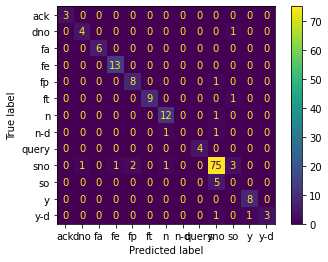

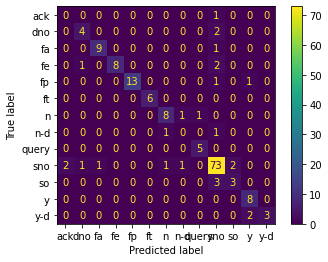

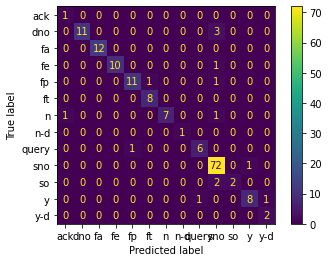

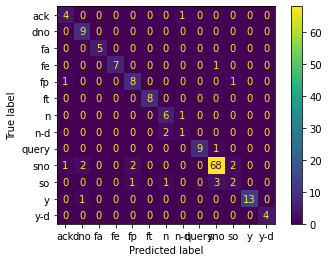

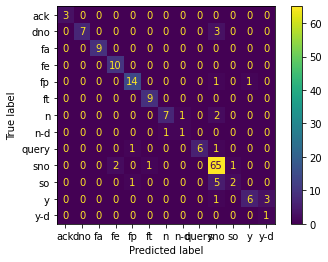

In [13]:
#Run kfold over here 
results = []
f1_scores=[]
best_model = []
for i in range(5):
    train_dataset = load_dataset('csv', data_files={'train': 'Data/split_train_'+ str(i)+'.csv'})
    testing_dataset =load_dataset("csv", data_files={'test':'Data/split_test_'+ str(i)+'.csv'}) 
    #print(train_dataset["train"][0])

    tokenized_dataset_train =train_dataset.map(preprocess_function)
    #print(tokenized_dataset_train['train']['input_ids'])

    tokenized_dataset_test = testing_dataset.map(preprocess_function)
    
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    #dataset has been loaded correctly. 
    print("----------------------MODEL " + str(i)+"-------------------------------")

        
    model=BertForSequenceClassification.from_pretrained(model_name, num_labels=13)
    #device="cpu"
    device="cuda"
    model.to(device)


    training_args = TrainingArguments(
    num_train_epochs=best_params["epochs"],
    learning_rate=best_params["lr"],
    per_device_train_batch_size=best_params["batch_size"],  # batch size per device during training
    weight_decay=0.01,               # strength of weight decay
    #oad_best_model_at_end=True,
    logging_steps=100,
    #valuation_strategy="steps",
    output_dir="Models/BERT_13classes"
    )

    trainer = Trainer( model=model,
                  args=training_args,
                  train_dataset=tokenized_dataset_train['train'],
                  #eval_dataset=tokenized_dataset_valid['valid'],
                  tokenizer=tokenizer,
                  data_collator=data_collator
                 )


    trainer.train()

    y_pred=[]

    for text in tokenized_dataset_test["test"]["text"]:
        y_pred.append(get_prediction(text))

    predictions = le.inverse_transform(y_pred)
    y_true = tokenized_dataset_test['test']["label"]

    acc = accuracy_score(le.inverse_transform(y_true), predictions)
    #f1_score = f1_score(le.inverse_transform(y_true), predictions, average="macro")
    #f1_scores.append(f1_score)
    results.append(acc)
    print(classification_report(le.inverse_transform(y_true), predictions))
    f1= f1_score(le.inverse_transform(y_true), predictions, average="macro")
    f1_scores.append(f1)
    cm = confusion_matrix(le.inverse_transform(y_true), predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot()
    


## Train the best classifier 

In [16]:
best_params = {"batch_size":8, 
              "lr": 5e-5,
               
              "epochs": 40}

Using custom data configuration default-48076e348138ed6d


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\adianidm\.cache\huggingface\datasets\csv\default-48076e348138ed6d\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Using custom data configuration default-679209d6d0502bce


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\adianidm\.cache\huggingface\datasets\csv\default-679209d6d0502bce\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/662 [00:00<?, ?ex/s]

  0%|          | 0/165 [00:00<?, ?ex/s]

----------------------MODEL 2-------------------------------


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Step,Training Loss
100,1.512500
200,0.553900
300,0.281400
400,0.170400
500,0.113500
600,0.053900
700,0.056800
800,0.065500
900,0.059600
1000,0.041400


Saving model checkpoint to Models/BERT_13classes_output\checkpoint-500
Configuration saved in Models/BERT_13classes_output\checkpoint-500\config.json
Model weights saved in Models/BERT_13classes_output\checkpoint-500\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_output\checkpoint-500\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_output\checkpoint-500\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes_output\checkpoint-1000
Configuration saved in Models/BERT_13classes_output\checkpoint-1000\config.json
Model weights saved in Models/BERT_13classes_output\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_output\checkpoint-1000\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_output\checkpoint-1000\special_tokens_map.json
Saving model checkpoint to Models/BERT_13classes_output\checkpoint-1500
Configuration saved in Models/BERT_13classes_output\checkpoint-15

              precision    recall  f1-score   support

         ack       0.50      1.00      0.67         1
         dno       1.00      0.86      0.92        14
          fa       1.00      1.00      1.00        12
          fe       1.00      1.00      1.00        11
          fp       0.92      0.85      0.88        13
          ft       0.89      1.00      0.94         8
           n       1.00      0.78      0.88         9
         n-d       0.00      0.00      0.00         1
       query       0.86      0.86      0.86         7
         sno       0.92      0.97      0.95        73
          so       0.50      0.50      0.50         4
           y       0.89      0.80      0.84        10
         y-d       0.67      1.00      0.80         2

    accuracy                           0.92       165
   macro avg       0.78      0.82      0.79       165
weighted avg       0.92      0.92      0.91       165



Saving model checkpoint to Models/BERT_13classes_best_classifier
Configuration saved in Models/BERT_13classes_best_classifier\config.json
Model weights saved in Models/BERT_13classes_best_classifier\pytorch_model.bin
tokenizer config file saved in Models/BERT_13classes_best_classifier\tokenizer_config.json
Special tokens file saved in Models/BERT_13classes_best_classifier\special_tokens_map.json


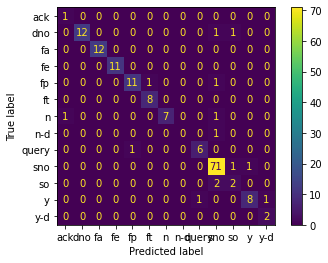

In [17]:
#Run kfold over here 
results = []
f1_scores=[]
best_model = []
i = 2
train_dataset = load_dataset('csv', data_files={'train': 'Data/split_train_'+ str(i)+'.csv'})
testing_dataset =load_dataset("csv", data_files={'test':'Data/split_test_'+ str(i)+'.csv'}) 
#print(train_dataset["train"][0])

tokenized_dataset_train =train_dataset.map(preprocess_function)
#print(tokenized_dataset_train['train']['input_ids'])

tokenized_dataset_test = testing_dataset.map(preprocess_function)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
#dataset has been loaded correctly. 
print("----------------------MODEL " + str(i)+"-------------------------------")


model=BertForSequenceClassification.from_pretrained(model_name, num_labels=13)
#device="cpu"
device="cuda"
model.to(device)


training_args = TrainingArguments(
num_train_epochs=best_params["epochs"],
learning_rate=best_params["lr"],
per_device_train_batch_size=best_params["batch_size"],  # batch size per device during training
weight_decay=0.01,               # strength of weight decay
#oad_best_model_at_end=True,
logging_steps=100,
#valuation_strategy="steps",
output_dir="Models/BERT_13classes_output"
)

trainer = Trainer( model=model,
              args=training_args,
              train_dataset=tokenized_dataset_train['train'],
              #eval_dataset=tokenized_dataset_valid['valid'],
              tokenizer=tokenizer,
              data_collator=data_collator
             )


trainer.train()

y_pred=[]

for text in tokenized_dataset_test["test"]["text"]:
    y_pred.append(get_prediction(text))

predictions = le.inverse_transform(y_pred)
y_true = tokenized_dataset_test['test']["label"]

acc = accuracy_score(le.inverse_transform(y_true), predictions)
#f1_score = f1_score(le.inverse_transform(y_true), predictions, average="macro")
#f1_scores.append(f1_score)
results.append(acc)
print(classification_report(le.inverse_transform(y_true), predictions))
f1= f1_score(le.inverse_transform(y_true), predictions, average="macro")
f1_scores.append(f1)
cm = confusion_matrix(le.inverse_transform(y_true), predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()

trainer.save_model("Models/BERT_13classes_best_classifier")